In [ ]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import CSP
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report
from mne.decoding import CSP
from sklearn.pipeline import make_pipeline

In [ ]:
from scipy.signal import butter, filtfilt

In [ ]:
trig = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/motorImagery_left_right_10_03_2024_14_08_01.csv', header=None)

In [ ]:
trig = pd.DataFrame(trig)

In [ ]:
left_file = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/UnicornRecorder_leftHand_10sec.csv', header=None)
right_file = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/UnicornRecorder_rightHand_10sec.csv', header=None)

In [ ]:
display(left_file)

0           1           2           3           4           5   \
0       25637.290   24129.830   30779.500   35225.690   24569.010   25127.240   
1       97960.860   92238.090  117578.600  134511.100   93909.980   96023.230   
2      178584.700  168262.700  214261.000  244993.000  171284.900  175087.800   
3      229310.900  216250.100  274967.800  314220.700  220072.400  224884.400   
4      244220.600  230556.500  292632.400  334173.300  234537.800  239586.400   
...           ...         ...         ...         ...         ...         ...   
75589       2.645       1.473       2.973       2.345       3.116      -1.931   
75590       4.499       2.878       4.840       4.236       5.434      -0.348   
75591       6.479       4.131       6.485       5.658       7.068       0.906   
75592       7.564       4.178       6.788       5.948       6.728       0.408   
75593       8.281       3.523       6.331       6.100       5.193      -1.432   

               6           7      8      9      10     11     12     13  \
0       24267.300  -23755.350 -0.099  0.948 -0.308  0.000  0.000  0.000   
1       92755.500  -90497.370 -0.094  0.958 -0.323  0.000  0.000  0.000   
2      169168.500 -164205.200 -0.092  0.962 -0.331  0.000  0.000  0.000   
3      217331.200 -209494.700 -0.092  0.963 -0.330  0.000  0.000  0.000   
4      231596.800 -221275.700 -0.093  0.964 -0.331 -4.456 -2.808 -2.777   
...           ...         ...    ...    ...    ...    ...    ...    ...   
75589      -0.842       0.212 -0.048  0.955 -0.366 -1.251  1.221  0.305   
75590       2.595       3.711 -0.047  0.956 -0.363 -1.099  1.343  0.366   
75591       5.078       6.266 -0.050  0.956 -0.363 -1.129  1.373  0.427   
75592       4.867       6.533 -0.051  0.956 -0.365 -1.129  1.434  0.366   
75593       2.079       5.402 -0.051  0.957 -0.367 -1.068  1.404  0.336   

            14    15   16      17   18  
0          1.0  80.0  1.0   0.000  0.0  
1          2.0  80.0  1.0  13.507  0.0  
2          3.0  80.0  1.0   2.410  0.0  
3          4.0  80.0  1.0   3.811  0.0  
4          5.0  80.0  1.0   3.262  0.0  
...        ...   ...  ...     ...  ...  
75589  75590.0  80.0  1.0   0.022  0.0  
75590  75591.0  80.0  1.0   1.892  0.0  
75591  75592.0  80.0  1.0   2.478  0.0  
75592  75593.0  80.0  1.0   8.177  0.0  
75593  75594.0  80.0  1.0   0.022  0.0  

[75594 rows x 19 columns]

In [ ]:
left_eeg = left_file.iloc[:, :8].transpose()
right_eeg = right_file.iloc[:, :8].transpose()

In [ ]:
fs = 250
time_start = 10
n = time_start*fs

left_eeg = left_eeg.iloc[:,n:]
right_eeg = right_eeg.iloc[:,n:]

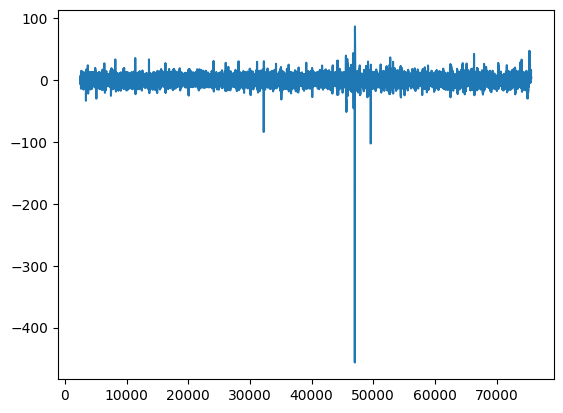

In [ ]:
plt.plot(left_eeg.iloc[1,n:]) # channel 1

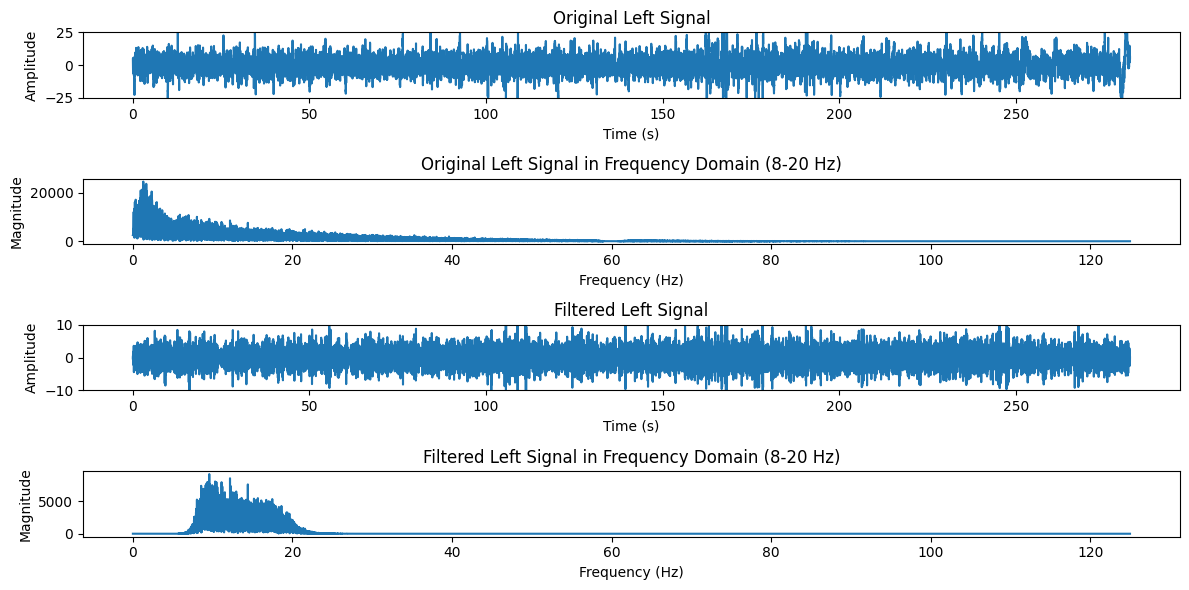

In [ ]:
left_signal = left_eeg.iloc[4,n:]

left_samples = len(left_signal/2)
time = np.arange(0, int(left_samples)) / fs

# Perform FFT on the signal
left_fft_result = np.fft.rfft(left_signal)

# Calculate the frequency axis
left_frequency = np.fft.rfftfreq(int(left_samples), d=1/fs)

# Define the bandpass filter frequencies (8 Hz to 20 Hz)
lowcut = 8.0
highcut = 20.0

# Design a bandpass Butterworth filter
order = 5  # Filter order
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply the bandpass filter to the FFT result
left_filtered_signal = filtfilt(b, a, left_signal)

# Perform FFT on the filtered signal
left_filtered_fft_result = np.fft.rfft(left_filtered_signal)

# Plot the original and filtered signal
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(time, left_signal)
plt.title('Original Left Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-25, 25])

plt.subplot(4, 1, 2)
plt.plot(left_frequency, np.abs(left_fft_result))
plt.title('Original Left Signal in Frequency Domain (8-20 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(4, 1, 3)
plt.plot(time, left_filtered_signal)
plt.title('Filtered Left Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim([-10, 10])


plt.subplot(4, 1, 4)
plt.plot(left_frequency, np.abs(left_filtered_fft_result))
plt.title('Filtered Left Signal in Frequency Domain (8-20 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

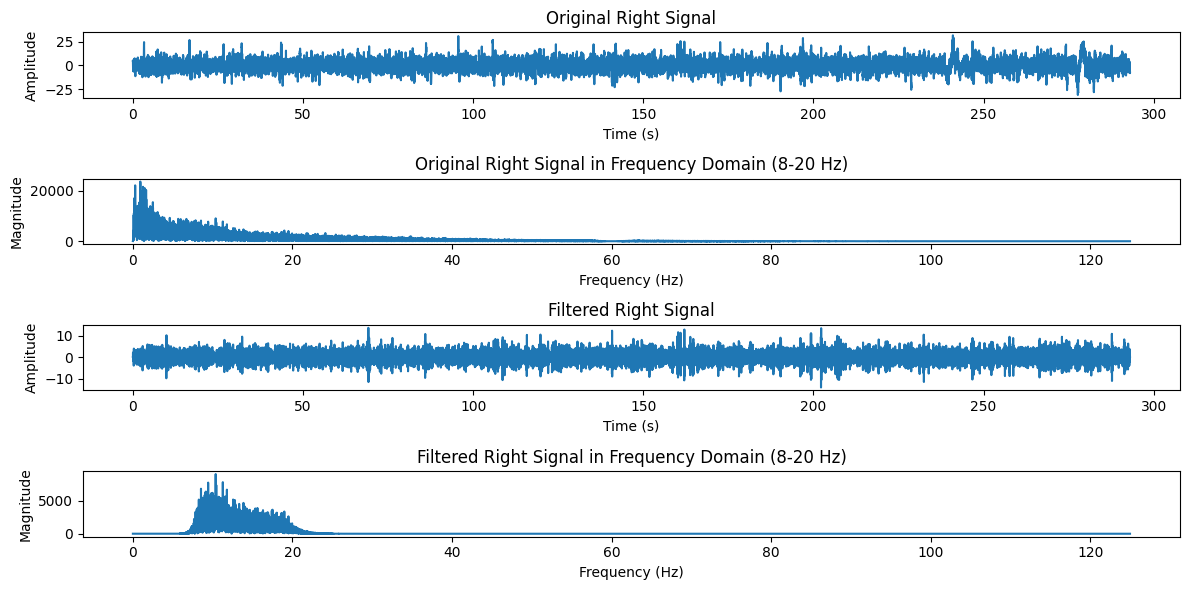

In [ ]:
right_signal = right_eeg.iloc[4,n:]

right_samples = len(right_signal/2)
right_time = np.arange(0, int(right_samples)) / fs

right_fft_result = np.fft.rfft(right_signal)

# Calculate the frequency axis
right_frequency = np.fft.rfftfreq(int(right_samples), d=1/fs)

# Define the bandpass filter frequencies (8 Hz to 20 Hz)
lowcut = 8.0
highcut = 20.0

# Design a bandpass Butterworth filter
order = 5  # Filter order
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Apply the bandpass filter to the FFT result
right_filtered_signal = filtfilt(b, a, right_signal)

# Perform FFT on the filtered signal
right_filtered_fft_result = np.fft.rfft(right_filtered_signal)

# Plot the original and filtered signal
plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
plt.plot(right_time, right_signal)
plt.title('Original Right Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(right_frequency, np.abs(right_fft_result))
plt.title('Original Right Signal in Frequency Domain (8-20 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(4, 1, 3)
plt.plot(right_time, right_filtered_signal)
plt.title('Filtered Right Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(right_frequency, np.abs(right_filtered_fft_result))
plt.title('Filtered Right Signal in Frequency Domain (8-20 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

## Filtered EEG Dataset - CSP-SVM Classifier

In [ ]:
target_values_per_row = 2500

# Calculate the remainder when dividing the current number of values by 2500
remainder = left_eeg.shape[1] % target_values_per_row

# Trim the data to achieve the desired number of values per row
if remainder != 0:
    # If the remainder is not zero, trim the data
    left_eeg = left_eeg.iloc[:, :-remainder]
    right_eeg = right_eeg.iloc[:, :-remainder]

In [ ]:
left_filtered_eeg = np.zeros_like(left_eeg, dtype=float)
right_filtered_eeg = np.zeros_like(right_eeg, dtype=float)

# Define the bandpass filter frequencies (8 Hz to 20 Hz)
lowcut = 8.0
highcut = 20.0

# Design a bandpass Butterworth filter
order = 5  # Filter order
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

for i in range(len(left_eeg)):
    left_signal = left_eeg.iloc[i,:]
    left_filtered_signal = filtfilt(b, a, left_signal)
    left_filtered_eeg[i,:] = left_filtered_signal

    right_signal = right_eeg.iloc[i,:]
    right_filtered_signal = filtfilt(b, a, right_signal)
    right_filtered_eeg[i,:] = right_filtered_signal

In [ ]:
trial_samples = fs*10

left_filtered_eeg_clean = np.zeros((len(left_filtered_eeg), left_filtered_eeg.shape[1] - 2500*2))
# left_filtered_eeg_clean = np.zeros((len(left_filtered_eeg), left_filtered_eeg.shape[1]))

for ch in range(len(left_filtered_eeg)):
  for i in range(int(left_filtered_eeg.shape[1]/trial_samples)):

    trial_start_sample = i*trial_samples
    trial_end_sample = i*trial_samples + trial_samples-1
    trial_18_start = (i+1)*trial_samples
    trial_18_end = (i+1)*trial_samples + trial_samples

    # Check if it's the 17th epoch
    if i == 17:
        # Create a mask to exclude the 17th epoch samples
        mask = np.ones_like(left_filtered_eeg[ch, :], dtype=bool)
        mask[trial_start_sample:trial_18_end] = False

        # Apply the mask to obtain the new array without the 17th epoch
        left_filtered_eeg_clean[ch, :] = left_filtered_eeg[ch, :][mask]

left_filtered_eeg_clean.shape

(8, 67500)

In [ ]:
left_average_power_spectrum = np.zeros((len(left_filtered_eeg_clean), int(left_filtered_eeg_clean.shape[1]/trial_samples) - 2))
# left_average_power_spectrum = np.zeros((len(left_filtered_eeg_clean), int(left_filtered_eeg_clean.shape[1]/trial_samples)))
for ch in range(len(left_filtered_eeg_clean)):
  for i in range(int(left_filtered_eeg_clean.shape[1]/trial_samples - 2)):
  # for i in range(int(left_filtered_eeg_clean.shape[1]/trial_samples)):

    trial_start_sample = i*trial_samples
    trial_end_sample = i*trial_samples + trial_samples-1

    left_trial = left_filtered_eeg_clean[ch,trial_start_sample:trial_end_sample]

    # Calculate the power spectrum using FFT
    left_trial_fft = np.fft.rfft(left_trial)
    left_power_spectrum = np.abs(left_trial_fft) ** 2

    # Store the power spectrum for this trial
    left_average_power_spectrum[ch,i] = left_power_spectrum.mean()

In [ ]:
avg_pow = pd.DataFrame(left_average_power_spectrum)

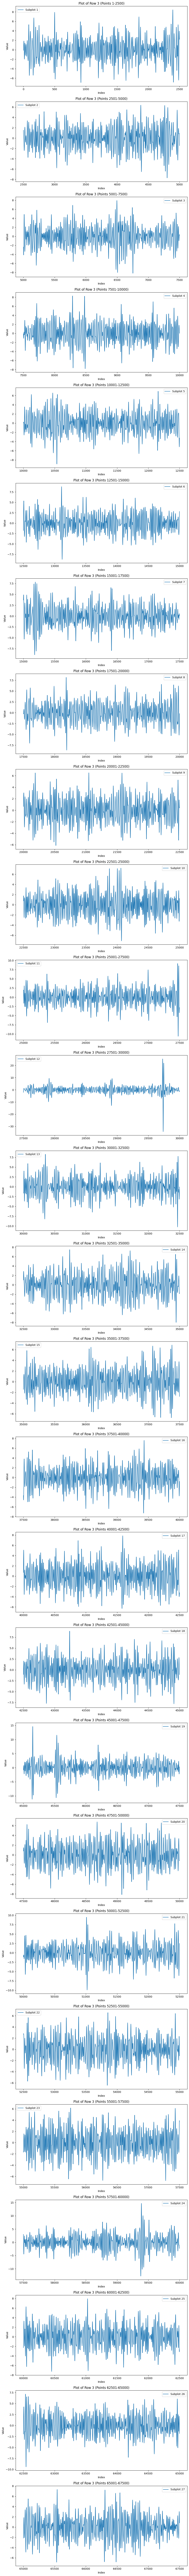

In [ ]:
row_to_plot = 3
data_row = left_filtered_eeg_clean[row_to_plot, :]

points_per_subplot = 2500

total_subplots = int(np.ceil(len(data_row) / points_per_subplot))

# Plot each set of 2500 points in a separate subplot
fig, axs = plt.subplots(total_subplots, 1, figsize=(10, 5 * total_subplots))

for i in range(total_subplots):
    start_index = i * points_per_subplot
    end_index = min((i + 1) * points_per_subplot, len(data_row))

    axs[i].plot(range(start_index, end_index), data_row[start_index:end_index], label=f'Subplot {i + 1}')
    axs[i].set_title(f'Plot of Row {row_to_plot} (Points {start_index + 1}-{end_index})')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()

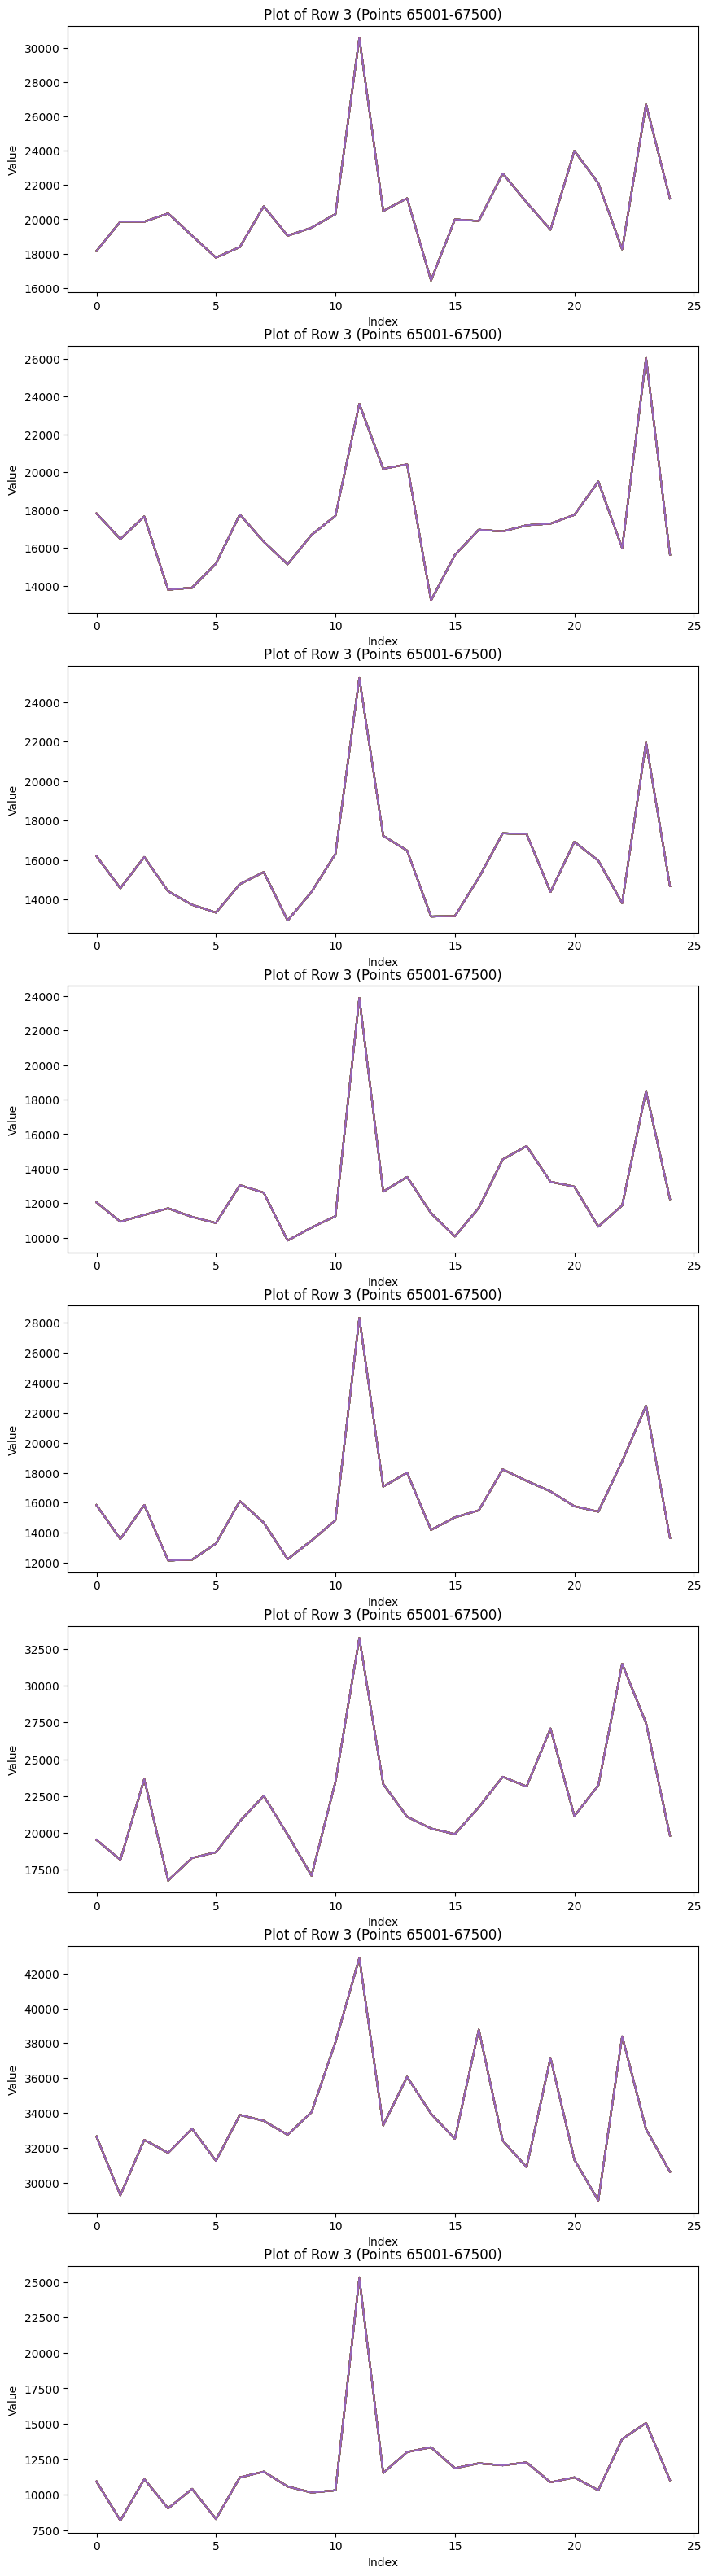

In [ ]:
total_subplots = int(np.ceil(len(avg_pow)))

# Plot each set of 2500 points in a separate subplot
fig, axs = plt.subplots(total_subplots, 1, figsize=(10, 5 * total_subplots))

for ch in range(avg_pow.shape[0]):
  for i in range(avg_pow.shape[1]):
      # start_index = i * points_per_subplot
      # end_index = min((i + 1) * points_per_subplot, len(avg_pow))

      axs[ch].plot(range(0, 25), avg_pow.iloc[ch, :], label=f'Subplot {i + 1}')
      axs[ch].set_title(f'Plot of Row {row_to_plot} (Points {start_index + 1}-{end_index})')
      axs[ch].set_xlabel('Index')
      axs[ch].set_ylabel('Value')

In [ ]:
right_average_power_spectrum = np.zeros((len(right_filtered_eeg), int(right_filtered_eeg.shape[1]/trial_samples)))
# left_average_power_spectrum = np.zeros((len(left_filtered_eeg_clean), int(left_filtered_eeg_clean.shape[1]/trial_samples)))
for ch in range(len(right_filtered_eeg)):
  for i in range(int(right_filtered_eeg.shape[1]/trial_samples)):
  # for i in range(int(left_filtered_eeg_clean.shape[1]/trial_samples)):

    trial_start_sample = i*trial_samples
    trial_end_sample = i*trial_samples + trial_samples-1

    right_trial = right_filtered_eeg[ch,trial_start_sample:trial_end_sample]

    # Calculate the power spectrum using FFT
    right_trial_fft = np.fft.rfft(right_trial)
    right_power_spectrum = np.abs(right_trial_fft) ** 2

    # Store the power spectrum for this trial
    right_average_power_spectrum[ch,i] = right_power_spectrum.mean()

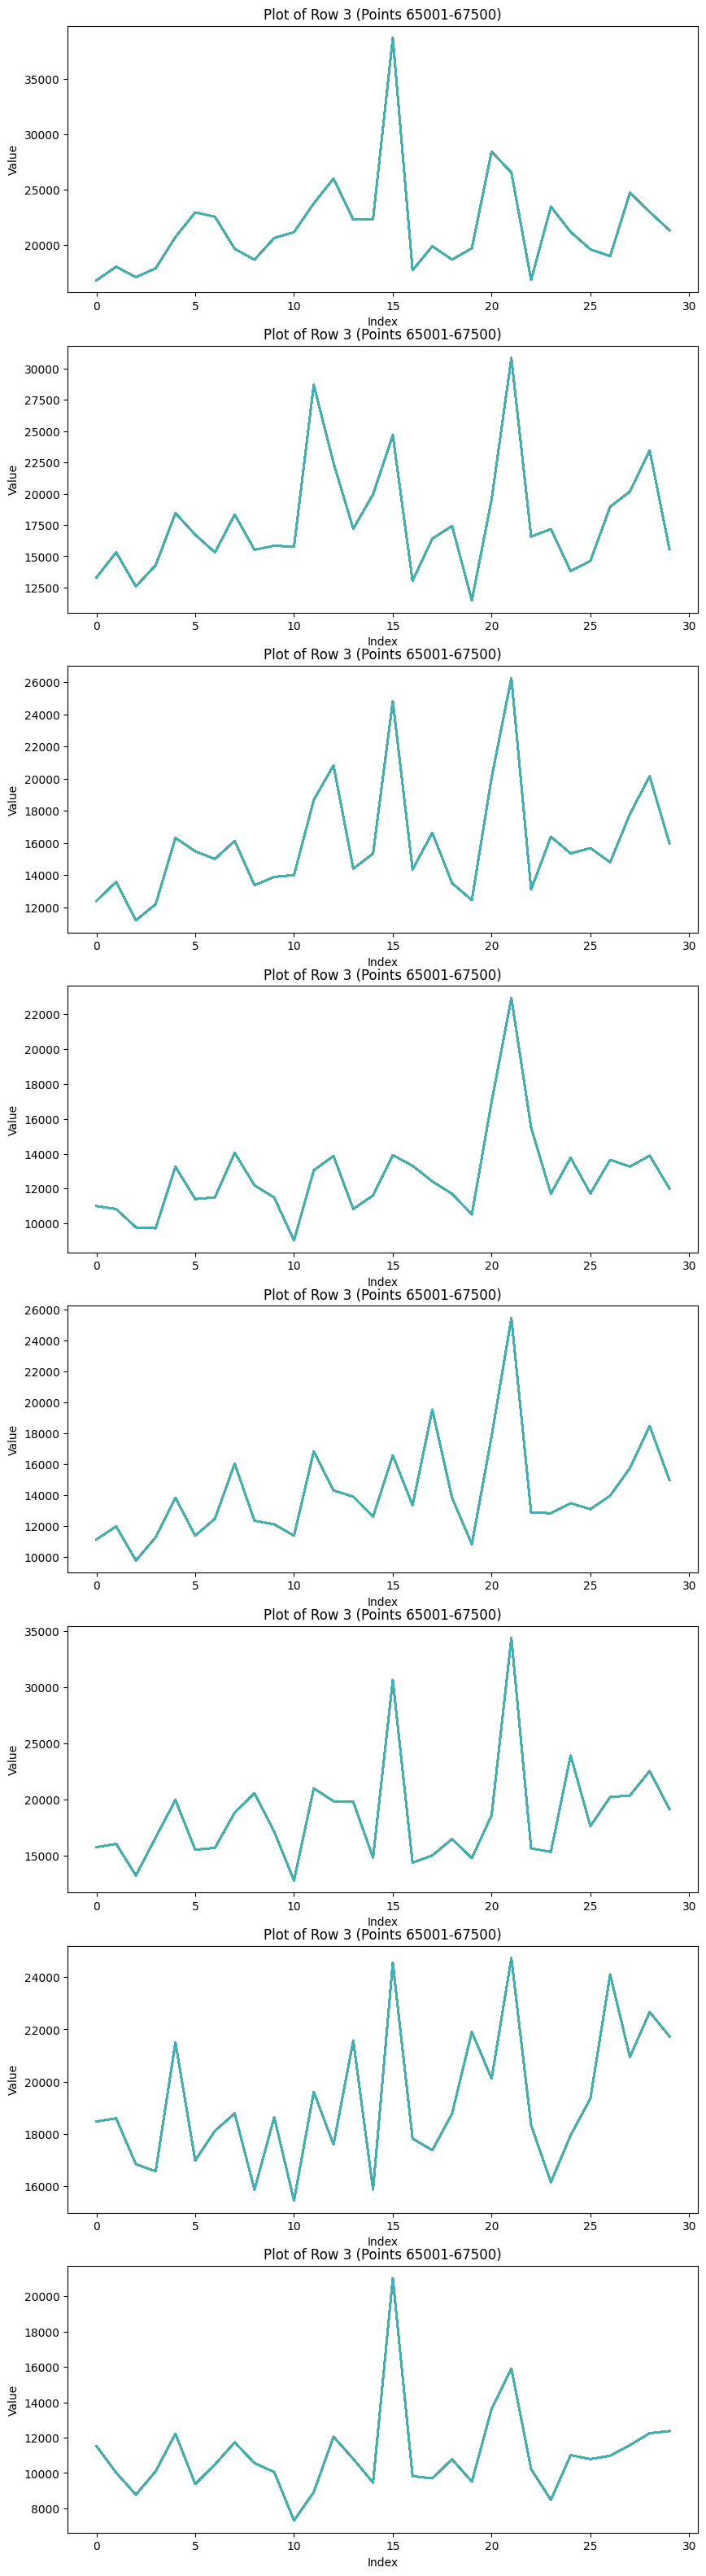

In [ ]:
right_avg_pow = pd.DataFrame(right_average_power_spectrum)

total_subplots = int(np.ceil(len(right_avg_pow)))

# Plot each set of 2500 points in a separate subplot
fig, axs = plt.subplots(total_subplots, 1, figsize=(10, 5 * total_subplots))

for ch in range(right_avg_pow.shape[0]):
  for i in range(right_avg_pow.shape[1]):
      # start_index = i * points_per_subplot
      # end_index = min((i + 1) * points_per_subplot, len(avg_pow))

      axs[ch].plot(range(right_avg_pow.shape[1]), right_avg_pow.iloc[ch, :], label=f'Subplot {i + 1}')
      axs[ch].set_title(f'Plot of Row {row_to_plot} (Points {start_index + 1}-{end_index})')
      axs[ch].set_xlabel('Index')
      axs[ch].set_ylabel('Value')

In [ ]:
# Determine the total number of points to trim from the start and end
points_to_trim_start = 7500
points_to_trim_end = 169

# Trim the specified number of points from the start and end
trimmed_right_filtered_eeg = right_filtered_eeg[:, points_to_trim_start:-points_to_trim_end]


In [ ]:
set_size = 2500

# Calculate the number of sets
num_sets = left_filtered_eeg_clean.shape[1] // set_size

# Create two new datasets with sets of 2500 values
left_sets = np.array([left_filtered_eeg_clean[:, i * set_size : (i + 1) * set_size] for i in range(num_sets)])
right_sets = np.array([trimmed_right_filtered_eeg[:, i * set_size : (i + 1) * set_size] for i in range(num_sets)])

In [ ]:
# Assuming 'left_trials' and 'right_trials' are your trials for left and right movements
# Each trial is represented by a feature vector

# Assign labels (0 for left, 1 for right)
left_labels = np.zeros(len(left_sets))
right_labels = np.ones(len(right_sets))

# Concatenate left and right trials with labels
all_trials = np.concatenate((left_sets, right_sets), axis=0)
all_labels = np.concatenate((left_labels, right_labels))

# n_channels, total_features = all_trials.shape
# n_trials = 27  # specify the number of channels
# n_time_points = 2500
# all_trials_reshaped = all_trials.reshape(n_channels, n_trials, n_time_points)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_trials, all_labels, test_size=0.4, random_state=42)

# Create CSP transformer
n_components = 4  # You can adjust the number of components based on your dataset
csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False)

# Fit CSP on training data
csp.fit(X_train, y_train)

# Transform training and testing data
X_train_csp = csp.transform(X_train)
X_test_csp = csp.transform(X_test)

# Train a classifier (e.g., SVM) on the transformed data
clf = SVC(kernel='linear', C=1)
clf.fit(X_train_csp, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_csp)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

display(f'Accuracy: {accuracy}')
display(f'F1 Score: {f1}')
display(f'Precision: {precision}')
display('Confusion Matrix:')
display(conf_matrix)

Computing rank from data with rank=None
    Using tolerance 2.2 (2.2e-16 eps * 8 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1 (2.2e-16 eps * 8 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.


'Accuracy: 1.0'

'F1 Score: 1.0'

'Precision: 1.0'

'Confusion Matrix:'

array([[12,  0],
       [ 0, 10]])

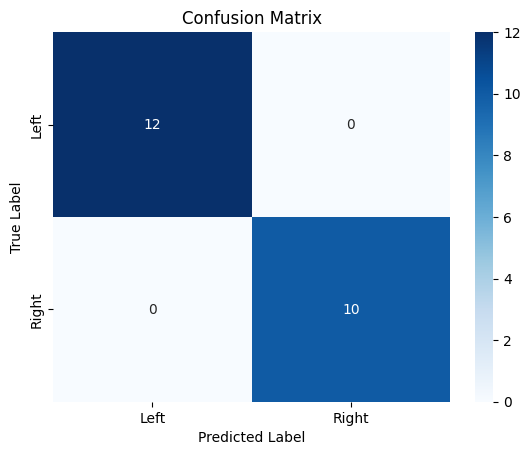

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [ ]:
# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Left', 'Right'], yticklabels=['Left', 'Right'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

In [ ]:
import joblib

In [ ]:
drive_path = '/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/CSP_SVM_MotorImagery_Classifier.joblib'


In [ ]:
joblib.dump(clf, drive_path)

['/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/CSP_SVM_MotorImagery_Classifier.joblib']

buffer[1,:,:].reshape(1,8,2500)

## NEW DATA - SUNDAY

In [ ]:
import pickle

# Specify the file path
file_path = '/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/leftrightnone/motorImagery.pkl'

# Open the file in binary mode and read the data
with open(file_path, 'rb') as file:
    trigs = pickle.load(file)

In [ ]:
full_df = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/motorImagery/leftrightnone/motorImagery_leftrightnone_latest_10_03_2024_15_51_34.csv', header=None)

In [ ]:
full_df_eeg = full_df.iloc[:,:8]

In [ ]:
fs = 250
t_start = 3
t_start_sample = fs*t_start

cropped_df_eeg = full_df_eeg.iloc[t_start_sample:,:]
cropped_df_eeg = cropped_df_eeg.reset_index(drop=True)

In [ ]:
cropped_df_eeg = cropped_df_eeg.iloc[:75000,:]

In [ ]:
epoch_size = 2500

# Calculate the total number of chunks
num_epochs = (len(cropped_df_eeg) + epoch_size - 1) // epoch_size

# Loop through each chunk
for i in range(num_epochs):
    start_idx = i * epoch_size
    end_idx = min((i + 1) * epoch_size, len(cropped_df_eeg))
    # display(start_idx, end_idx)
num_epochs
    # Get the chunk of data
    # epoch = cropped_df_eeg.iloc[start_idx:end_idx]

30

In [ ]:
cropped_df_eeg['Label'] = np.repeat(trigs, 2500)
cropped_df_eeg

<ipython-input-82-c344d5178030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df_eeg['Label'] = np.repeat(trigs, 2500)


0       1      2      3      4       5      6      7  Label
0      -5.496  -8.448 -1.473  2.152 -2.820  -9.659  1.149  3.106      3
1      -5.062  -8.652 -1.196  1.924 -3.040  -9.456 -0.886  2.034      3
2      -4.616  -8.177 -2.313 -0.825 -5.592  -9.522 -6.285 -1.946      3
3      -3.792  -6.702 -3.193 -2.962 -6.780  -8.210 -8.269 -4.762      3
4      -1.839  -3.960 -1.410 -1.078 -3.470  -2.569 -4.263 -2.607      3
...       ...     ...    ...    ...    ...     ...    ...    ...    ...
74995   2.599   1.024  4.022  4.168  3.597   3.129  3.387  1.156      3
74996   4.607   2.970  4.671  3.395  3.490   3.619  2.832  1.042      3
74997   6.393   4.770  4.691  1.914  2.486   3.206 -0.030  0.545      3
74998   8.317   7.507  5.636  2.204  3.315   4.964  0.816  1.173      3
74999  10.818  11.135  8.311  5.260  6.863  10.376  6.844  4.062      3

[75000 rows x 9 columns]

In [ ]:
cropped_df_eeg = cropped_df_eeg.transpose()

In [ ]:
cropped_df_eeg

0       1      2      3      4       5      6      7  Label
0      -5.496  -8.448 -1.473  2.152 -2.820  -9.659  1.149  3.106    3.0
1      -5.062  -8.652 -1.196  1.924 -3.040  -9.456 -0.886  2.034    3.0
2      -4.616  -8.177 -2.313 -0.825 -5.592  -9.522 -6.285 -1.946    3.0
3      -3.792  -6.702 -3.193 -2.962 -6.780  -8.210 -8.269 -4.762    3.0
4      -1.839  -3.960 -1.410 -1.078 -3.470  -2.569 -4.263 -2.607    3.0
...       ...     ...    ...    ...    ...     ...    ...    ...    ...
74995   2.599   1.024  4.022  4.168  3.597   3.129  3.387  1.156    3.0
74996   4.607   2.970  4.671  3.395  3.490   3.619  2.832  1.042    3.0
74997   6.393   4.770  4.691  1.914  2.486   3.206 -0.030  0.545    3.0
74998   8.317   7.507  5.636  2.204  3.315   4.964  0.816  1.173    3.0
74999  10.818  11.135  8.311  5.260  6.863  10.376  6.844  4.062    3.0

[75000 rows x 9 columns]

In [ ]:
eeg_data = cropped_df_eeg.iloc[:, :-1]
labels = cropped_df_eeg['Label']

# Create three separate datasets based on labels
dataset_left = cropped_df_eeg[labels == 1].iloc[:, :-1]
dataset_right = cropped_df_eeg[labels == 2].iloc[:, :-1]
dataset_none = cropped_df_eeg[labels == 3].iloc[:, :-1]

In [ ]:
dataset_left = dataset_left.transpose()

In [ ]:
dataset_right = dataset_right.transpose()
dataset_none = dataset_none.transpose()

In [ ]:
# testsig = dataset_left.iloc[:,:2500]
chunk_size = 2500

# Iterate through 'testsig' in chunks
for i in range(0, len(dataset_left.columns), chunk_size):
    # Extract a chunk of 2500 samples
    # display(i,i+chunk_size)
    chunk = dataset_left.iloc[:, i:i+chunk_size]

    X_test_csp = csp.transform(chunk.to_numpy().reshape(1,8,2500))
    y_pred = clf.predict(X_test_csp)

    display(y_pred)

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

In [ ]:
# testsig = dataset_left.iloc[:,:2500]
chunk_size = 2500

# Iterate through 'testsig' in chunks
for i in range(0, len(dataset_right.columns), chunk_size):
    # Extract a chunk of 2500 samples
    # display(i,i+chunk_size)
    chunk = dataset_right.iloc[:, i:i+chunk_size]

    X_test_csp = csp.transform(chunk.to_numpy().reshape(1,8,2500))
    y_pred = clf.predict(X_test_csp)

    display(y_pred)

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([0.])

array([1.])

array([0.])

array([0.])

array([0.])

In [ ]:
for i in range(0, len(dataset_none.columns), chunk_size):
    # Extract a chunk of 2500 samples
    # display(i,i+chunk_size)
    chunk = dataset_none.iloc[:, i:i+chunk_size]

    X_test_csp = csp.transform(chunk.to_numpy().reshape(1,8,2500))
    y_pred = clf.predict(X_test_csp)

    display(y_pred)

array([0.])

array([0.])

array([0.])

array([1.])

array([0.])

array([1.])

array([1.])

array([0.])

array([0.])

array([0.])